In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from skimage import exposure
img = plt.imread ('images/spillway-dark.tif') #only png supported to change
print(img.dtype) #image type
print(img.shape) #image shape
plt.gray ()
plt.imshow (img)
plt.axis ("on")

uint8
(700, 936)


(-0.5, 935.5, 699.5, -0.5)

In [2]:
def intXform(f, mode, param = 1):
    out = np.zeros(len(f[0]))
    if (mode == 'negative'):
        for j in range(len(f[0])):
            out[j] = -1*j/len(f[0])
            for i in range(len(f)):
                f[i][j] = -1*f[i][j]
    elif (mode == 'log'):
        for j in range(len(f[0])):
            out[j] = np.log(j/len(f[0])+1)
            for i in range(len(f)):
                f[i][j] = np.log(f[i][j] + 1)
    elif (mode == 'gamma'):
        for j in range(len(f[0])):
            out[j] = np.power(j/len(f[0]),param)
            for i in range(len(f)):
                f[i][j] = np.power(f[i][j], param)
    return f, out

In [3]:
def contrast(image):
    return np.max(image) - np.min(image)

def ScaleIntensity (image, K=1):
    m = contrast(image)
    out = np.array(image).astype(float)
    for j in range(image.shape[1]):
        for i in range(image.shape[0]):
            out[i][j] = K*(out[i][j]/m)
    return out

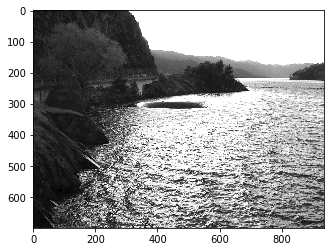

In [4]:
img2, p = intXform(ScaleIntensity(img), 'log')
plt.imshow(img2)

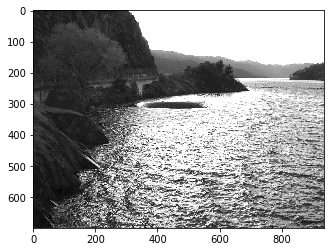

In [5]:
img3 , p2 = intXform(ScaleIntensity(img), 'gamma', 0.8)
plt.imshow(img3)

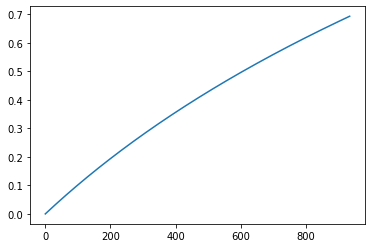

In [6]:
ax = plt.axes()
ax.plot(p)

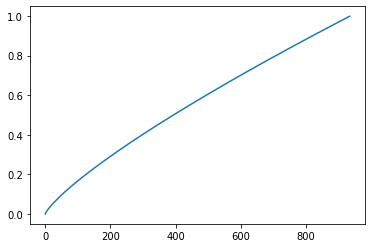

In [7]:
ax2 = plt.axes()
ax2.plot(p2)

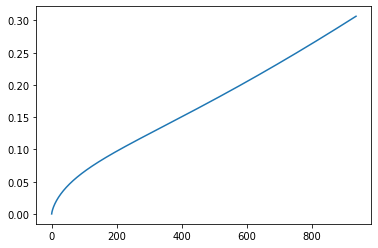

In [8]:
ax3 = plt.axes()
ax3.plot(p2-p) #hence p2 has higher increases in darker pixels and similar in lighter pixels

In [9]:
img11 = Image.open('images/pollen-lowcontrast.tif')

54.11764705882353 65.94203114509583


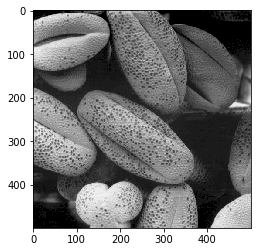

In [42]:
imgOut11 = np.asarray(img11)
plt.imshow(imgOut11)

mn, mx = np.percentile(imgOut11, (0, 100))
imgOut12 = exposure.rescale_intensity(imgOut11, in_range=(mn,mx)) #contrast stretching built-in

outttt = Image.fromarray(imgOut12)
outttt.save('images/pollen-stretched.tif')

In [21]:
def imageHist(f, mode = "n"):
    if (mode == "n"):
        return plt.hist(f.ravel(), 256, [0,256], density=1)
    else:
        return plt.hist(f.ravel(), 256, [0,256])

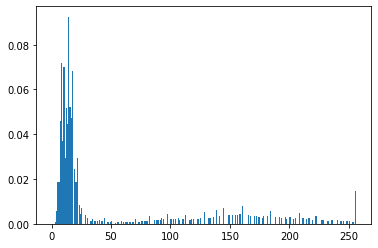

In [22]:
img4 = plt.imread('images/rose1024.tif')
img4a = np.asarray(img4)
hist = imageHist(img4a)
plt.show() #This image has a large set of values that are very dark and far less values spanning the full range

In [23]:
def histEqual(f):
    total = 0
    out = np.copy(f)
    rk, nk = np.unique(out, return_counts=True) #unique intensities and respective counts
    pk = nk/np.size(f) #probability of each unique intensity
    sk = np.cumsum(pk) #cumulative sums of pixel probabilities
    mul = sk*np.max(f) #cumulative frequency multiplied by max value
    roundVal = np.round(mul) #round each multiple
    for i in range(len(f)):
        for j in range(len(f[0])):
            out[i][j] = roundVal[np.where(rk==f[i][j])] #map pixels for equalization
    return out

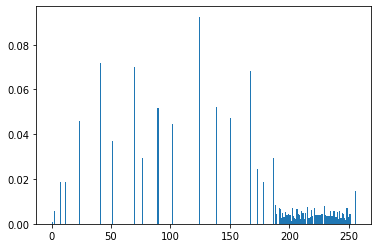

In [24]:
hist2 = imageHist(img4a)
hist3 = histEqual(img4a)
plt.cla()
plt.hist(hist3.ravel(), 256, [0,256], density=1)
plt.show()

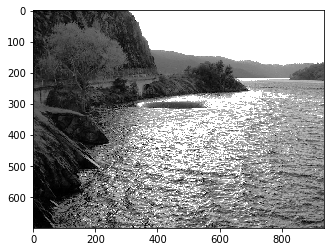

In [15]:
spillway = plt.imread('images/spillway-dark.tif')
spillwayA = np.asarray(spillway)
spillwayE = histEqual(spillwayA)
plt.imshow(spillwayE)

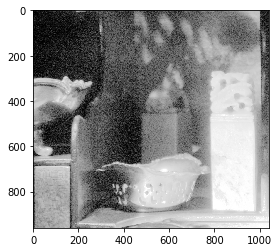

In [16]:
horse = plt.imread('images/hidden-horse.tif')
horseA = np.asarray(horse)
horseE = histEqual(horseA)
plt.imshow(horseE)

In [17]:
def highlight(f,intensityRange, preserveBackground = False):
    out = np.copy(f)
    for i in range(len(f)):
        for j in range(len(f[0])):
            if f[i][j]>=intensityRange[0] and f[i][j]<=intensityRange[1]:
                out[i][j] = 170
            elif preserveBackground == False:
                out[i][j] = 25
    return out

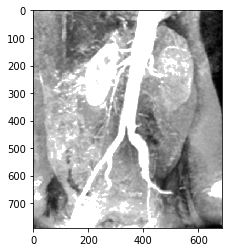

In [18]:
xray = plt.imread('images/angiogram-aortic-kidney.tif')
xrayA = np.asarray(xray)
xrayH = highlight(xrayA, [150,255], True)
plt.imshow(xrayH)

In [51]:
def bitPlaneSlice(f):
    lst = []
    out = []
    for i in range(len(f)):
        for j in range(len(f[0])):
            lst.append(np.binary_repr(f[i][j], width=8))
    out.append((np.array([int(i[7]) for i in lst],dtype = np.uint8) * 1).reshape(len(f),len(f[0])))
    out.append((np.array([int(i[6]) for i in lst],dtype = np.uint8) * 2).reshape(len(f),len(f[0])))
    out.append((np.array([int(i[5]) for i in lst],dtype = np.uint8) * 4).reshape(len(f),len(f[0])))
    out.append((np.array([int(i[4]) for i in lst],dtype = np.uint8) * 8).reshape(len(f),len(f[0])))
    out.append((np.array([int(i[3]) for i in lst],dtype = np.uint8) * 16).reshape(len(f),len(f[0])))
    out.append((np.array([int(i[2]) for i in lst],dtype = np.uint8) * 32).reshape(len(f),len(f[0])))
    out.append((np.array([int(i[1]) for i in lst],dtype = np.uint8) * 64).reshape(len(f),len(f[0])))
    out.append((np.array([int(i[0]) for i in lst],dtype = np.uint8) * 128).reshape(len(f),len(f[0])))
    return out

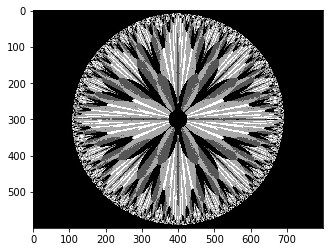

In [61]:
Frac = plt.imread('images/fractal-iris.tif')
fracA = np.asarray(Frac)
imgSlice = bitPlaneSlice(fracA)
plt.imshow(imgSlice[7]+imgSlice[6]+imgSlice[1]+imgSlice[0])

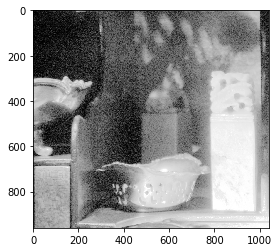

In [62]:
img_eq = exposure.equalize_hist(horseA)
plt.imshow(img_eq)